## Step 1: Data Preprocessing

#### Load the CSV:

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

df = pd.read_csv('shopping_trends.csv')


### Explore Data:

In [8]:
print("\nData Information:")
df.info()

print("\nDescriptive Statistics:")
print(df.describe())

print("\nCheck for missing values:")
print(df.isnull().sum())



Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   ob

### Visualize the distribution of categorical variables


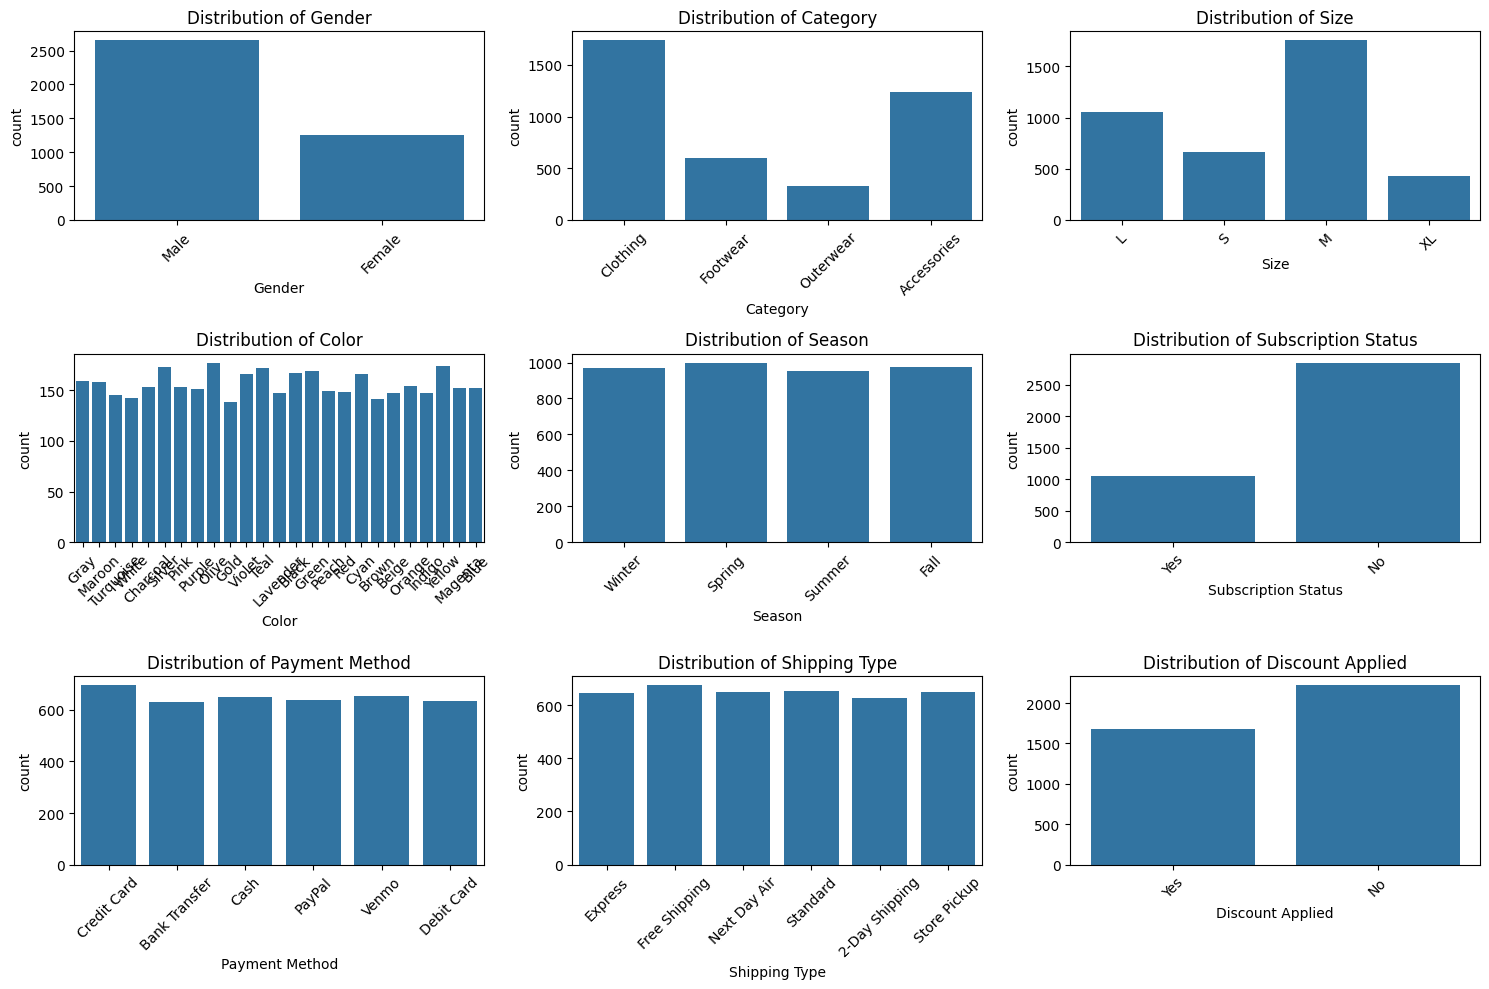

In [9]:
plt.figure(figsize=(15, 10))
categorical_cols = ['Gender', 'Category', 'Size', 'Color', 'Season', 
                    'Subscription Status', 'Payment Method', 
                    'Shipping Type', 'Discount Applied', 'Promo Code Used',
                    'Preferred Payment Method', 'Frequency of Purchases']

for i, col in enumerate(categorical_cols[:9]):  # Show only first 9 for space
    plt.subplot(3, 3, i+1)
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Visualize numeric variables

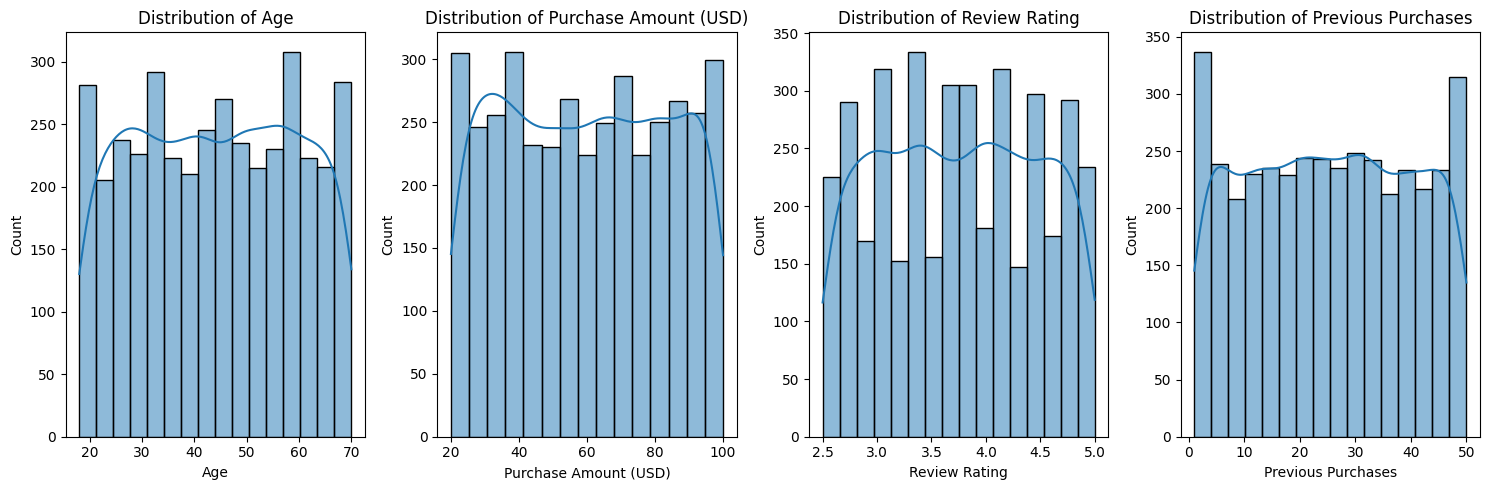

In [10]:
plt.figure(figsize=(15, 5))
numeric_cols = ['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']
for i, col in enumerate(numeric_cols):
    plt.subplot(1, 4, i+1)
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


### Define the target variable

In [ ]:
target = 'Subscription Status' 


### Identify features

In [ ]:
X = df.drop(['Customer ID', target], axis=1)
y = df[target]

## Split numeric and categorical features


In [ ]:
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()


In [ ]:
print("Numeric features:", numeric_features)
print("Categorical features:", categorical_features)


### Create preprocessing pipelines


In [ ]:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

### Combine preprocessing steps


In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

### Split the data


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
